In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import networkx as nx
from tqdm import tqdm

In [2]:
from networkx.algorithms.community import k_clique_communities

def max_clique_communities(G, k=3):# return the maximal size (number of nodes) of k-clique community, G is undirected graph
    if (k==2): 
        return len(max(nx.connected_components(G), key=len))
    else:
        c = list(k_clique_communities(G, k))
        if (len(c)==0):
            return 0
        else:
            return max([len(x) for x in c])

def clique_communities_enumerate(G,k_list): #return the list of clique community size for different k in k_list
    return np.array([max_clique_communities(G, k=k) for k in k_list])/G.number_of_nodes()

## K-clique percolation in semantic networks 

In [3]:
Gw=nx.read_graphml('data\\graphs\\data-swow.graphml').to_undirected() # the "English Small World of Words project"
Gf=nx.read_graphml('data\\graphs\\data-fl.graphml').to_undirected() # the Florida data set
Ge=nx.read_graphml('data\\graphs\\data-ed.graphml').to_undirected() # the Edinburgh Associative Thesaurus

Ph=nx.read_graphml('data\\graphs\\data-phon.graphml') # phonological
Sn=nx.read_graphml('data\\graphs\\data-syn.graphml') # synonyms
Tx=nx.read_graphml('data\\graphs\\data-taxon.graphml') # synonyms
Mg=nx.read_graphml('data\\graphs\\data-multi.graphml') # multiplex

Ru=nx.read_graphml('data\\graphs\\data-rus.graphml').to_undirected() # russian
Du=nx.read_graphml('data\\graphs\\data-dutch.graphml') # dutch

graphs=[Gw,Gf,Ge,Ph,Sn,Tx,Mg,Ru,Du]
labels=['SWoW','Florida','Edinburgh','phonological','synonyms','taxonomic','multiplex','Russian','Dutch']

In [74]:
k_values=np.linspace(2,12,11, dtype=int) #
cliqs=np.load('results\\semantic_cliqs.npy') 

In [21]:
# for calculation
cliqs=np.zeros([len(graphs),len(k_values)]) # 

for i in range(len(graphs)):
    cliqs[i,:]=clique_communities_enumerate(graphs[i],k_values)
    
#np.save('results\\semantic_cliqs.npy',cliqs)

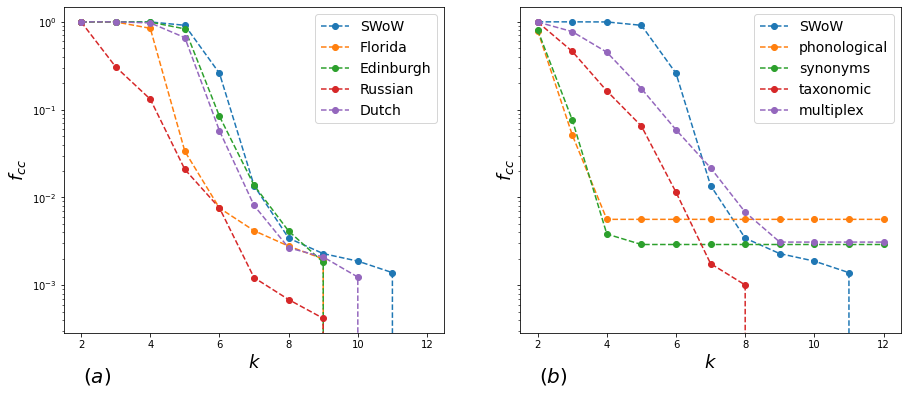

In [75]:
assocs=[0,1,2,7,8] # the free association datasets
semantics=[0,3,4,5,6] # english networks of different relations between words 

fig, ax = plt.subplots(nrows=1, sharex=False,sharey=True,ncols=2, figsize=(15, 6))
for i in assocs:
    ax[0].plot(k_values,cliqs[i], 'o--', label=labels[i])

for i in semantics:
    ax[1].plot(k_values,cliqs[i], 'o--', label=labels[i])
    
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$f_{cc}$', fontsize=18)
ax[0].set_xlabel(r'$k$', fontsize=18)
ax[0].legend(fontsize=14)

ax[1].set_yscale('log')
ax[1].set_ylabel(r'$f_{cc}$', fontsize=18)
ax[1].set_xlabel(r'$k$', fontsize=18)
ax[1].legend(fontsize=14)

ax[0].text(0.05, -0.1,  r'$ (a)$', transform=ax[0].transAxes,
            fontsize=20, fontweight='bold', va='top') 
ax[1].text(0.05, -0.1,  r'$ (b)$', transform=ax[1].transAxes,
            fontsize=20, fontweight='bold', va='top') 

#plt.savefig('figures\\fig-01.pdf')

## K-clique percolation in dependence on the association strength in SWoW EN

In [76]:
taus=np.logspace(-2.,-0.1,30) # the values of thresholds
cliqs_swow_1=np.load('results\\cliqs_swow_1.npy')

In [7]:
# for calculation
cliqs_swow_1=np.zeros([5, len(taus)])
H=Gw.copy()
for j in tqdm(range(len(taus))):
    edges=[(u,v) for (u,v,d) in H.edges(data=True) if d['R1.Strength'] <taus[j]]
    H.remove_edges_from(edges)
    H.remove_nodes_from(list(nx.isolates(H)))
    undirectedH=H.to_undirected()
    for i in range(5):
        cliqs_swow_1[i,j]=max_clique_communities(undirectedH, k=k_values[i])

100%|██████████| 30/30 [21:59<00:00, 43.97s/it]   


In [77]:
thetas=np.logspace(-0.1,-2,30)
cliqs_swow_2=np.load('results\\cliqs_swow_2.npy')

In [13]:
# for calculation
cliqs_swow_2=np.zeros([5, len(thetas)])
H=Gw.copy()
for j in tqdm(range(len(thetas))):
    edges=[(u,v) for (u,v,d) in H.edges(data=True) if d['R1.Strength'] >thetas[j]]
    H.remove_edges_from(edges)
    H.remove_nodes_from(list(nx.isolates(H)))
    undirectedH=H.to_undirected()
    for i in range(5):
        cliqs_swow_2[i,j]=max_clique_communities(undirectedH, k=k_values[i])


100%|██████████| 30/30 [5:24:03<00:00, 648.13s/it]


In [14]:
#np.save('results\\cliqs_swow_1.npy',cliqs_swow_1)
#np.save('results\\cliqs_swow_2.npy',cliqs_swow_2)

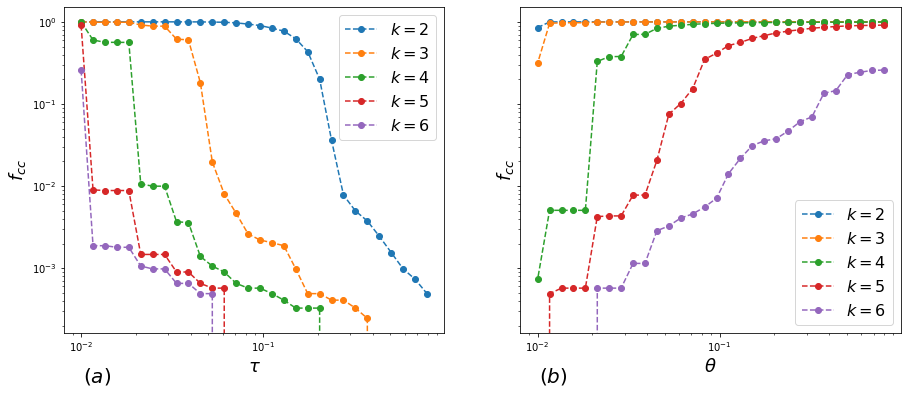

In [78]:
fig, ax = plt.subplots(nrows=1, sharex=False,sharey=True,ncols=2, figsize=(15, 6))
for i in range(5):
    ax[0].plot(taus,cliqs_swow_1[i]/Gw.number_of_nodes(), 'o--', label=r'$k=$'+str(k_values[i]))

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$f_{cc}$', fontsize=18)
ax[0].set_xlabel(r'$\tau$', fontsize=18)
ax[0].legend(fontsize=16)

ax[0].text(0.05, -0.1,  r'$ (a)$', transform=ax[0].transAxes,
            fontsize=20, fontweight='bold', va='top') 
for i in range(5):
    ax[1].plot(thetas,cliqs_swow_2[i]/Gw.number_of_nodes(), 'o--', label=r'$k=$'+str(k_values[i]))
    

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylabel(r'$f_{cc}$', fontsize=18)
ax[1].set_xlabel(r'$\theta$', fontsize=18)
ax[1].legend(fontsize=16)

ax[1].text(0.05, -0.1,  r'$ (b)$', transform=ax[1].transAxes,
            fontsize=20, fontweight='bold', va='top') 

#plt.savefig('figures\\fig-02.pdf')

## Triangles and cliques in dependence on the  association strength in SWoW En

In [79]:
def avg_weight_statistics(weights,props, bins): # averiging edge weights and edge properties in intervals, 
    #the number of intervals defines by bins 
    x=np.array(weights)[np.argsort(weights)]
    y=np.array(props)[np.argsort(weights)]
    b=len(x)//bins 
    x1,y1,sx1,sy1=[],[],[],[]
    for i in range(bins): 
        x1.append(np.mean(x[b*i:b*(i+1)]))
        sx1.append(np.std(x[b*i:b*(i+1)]))
        y1.append(np.mean(y[b*i:b*(i+1)]))
        sy1.append(np.std(y[b*i:b*(i+1)]))

    return x1,sx1,y1,sy1

def edge_clustering(H,edge):
    t=len(set(H[edge[0]])&set (H[edge[1]]))
    if (t==0):
        return 0
    else:
        return t/(np.min([len(set(H[edge[0]])), len(set (H[edge[1]]))])-1)
    
def edge_clique_number(G,edge):
    nodes=list(set(G[edge[0]])&set(G[edge[1]]))
    nodes=nodes+[edge[0]]+[edge[1]]
    sh=G.subgraph(nodes)
    return np.max([len(x) for x in nx.find_cliques(sh)])

In [80]:
def to_undirected_weighted_(G):
    H=G.to_undirected()
    for (u,v,d) in G.edges(data=True):
        if(G.has_edge(v,u)):
            if (G[u][v]['R1.Strength']>G[v][u]['R1.Strength']):
                H[u][v]['R1.Strength']=G[u][v]['R1.Strength']
            else:
                H[u][v]['R1.Strength']=G[v][u]['R1.Strength']
        H[v][u]['R1.Strength']=H[u][v]['R1.Strength']
    return H

H=to_undirected_weighted_(Gw) # with maximal weight for bidirected links

In [18]:
edge_cliqs=[edge_clique_number(H,e) for e in list(H.edges())]
edge_clusts=[edge_clustering(H,e) for e in list(H.edges())]
edge_strengths=[H[e[0]][e[1]]['R1.Strength'] for e in list(H.edges())]

In [60]:
bins=[2000,1000,500] # different bins for insert
x_b,y_b=[],[]
for b in bins:
    x,sx,y,sy=avg_weight_statistics(edge_clusts,edge_strengths, b)
    x_b.append(x)
    y_b.append(y)

x,sx,y,sy=avg_weight_statistics(edge_clusts,edge_strengths, bins=100)
z=np.polyfit(x,np.log(y),1)
p = np.poly1d(z)
print('Fit:',z)

Fit: [ 4.99453195 -4.42271391]


In [134]:
c1=[edge_cliqs[i] for i in range(len(edge_cliqs)) if edge_strengths[i]==0.01]
print('Weak associations:', len(c1)/H.number_of_edges())
c2=[edge_cliqs[i] for i in range(len(edge_cliqs)) if edge_strengths[i]>0.1]
print('Strong associations:', len(c2)/H.number_of_edges())
x1,x2=np.bincount(c1)/len(c1),np.bincount(c2)/len(c2)

Weak associations: 0.20128659517654504
Strong associations: 0.04716475171891272


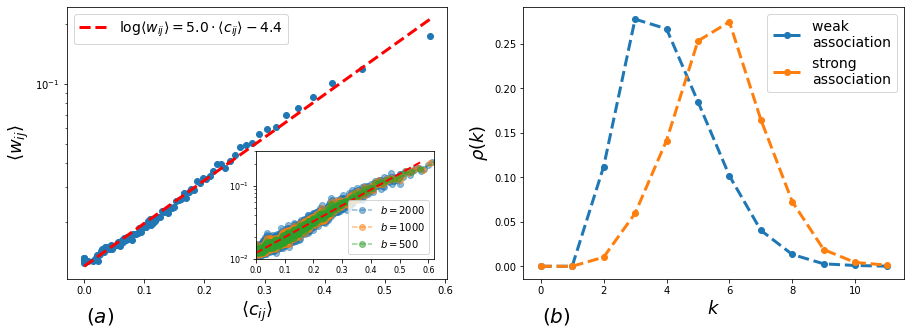

In [82]:
fig, ax = plt.subplots(nrows=1, sharex=False,sharey=False,ncols=2, figsize=(15, 5))

ax[0].plot(x,y,'o')
ax[0].plot(x,np.exp(p(x)),'--', color='r', linewidth=3.0, label=r'$\log \left<w_{ij}\right>=5.0\cdot\left<c_{ij}\right>-4.4$')
ax[0].set_yscale('log')
ax[0].legend(fontsize=14)

ax[0].set_ylabel(r'$\left<w_{ij}\right>$', fontsize=18)
ax[0].set_xlabel(r'$\left<c_{ij}\right>$', fontsize=18)

left, bottom, width, height = [0.3, 0.18, 0.165, 0.3] # positions for Insert graph
ax2 = fig.add_axes([left, bottom, width, height])
ax2.tick_params(axis='both', which='major', labelsize=8)
for i in range(3):
    ax2.plot(x_b[i],y_b[i],'o--',alpha=0.5, label= r'$b=$'+str(bins[i]))
    
ax2.plot(x,np.exp(p(x)),'--', color='r', linewidth=2.0)
ax2.legend(fontsize=10)
ax2.set_yscale('log')
ax2.axis([0.0,0.62,0.01,0.3])

ax[1].plot(x1, 'o--', linewidth=3.0, label='weak \nassociation')
ax[1].plot(x2, 'o--', linewidth=3.0, label='strong \nassociation')
ax[1].set_xlabel(r'$k$', fontsize=18)
ax[1].set_ylabel(r'$\rho(k)$', fontsize=18)
ax[1].legend(fontsize=14)


ax[0].text(0.05, -0.1,  r'$ (a)$', transform=ax[0].transAxes,
            fontsize=20, fontweight='bold', va='top') 
ax[1].text(0.05, -0.1,  r'$ (b)$', transform=ax[1].transAxes,
            fontsize=20, fontweight='bold', va='top') 

#plt.savefig('figures\\fig-04.pdf')

##  Growth experiments for free association networks

In [4]:
def remove_random_nodes(G,f):
    H=G.copy()
    nodes=list(G.nodes())
    r_nodes=np.random.choice(nodes, size=int(f*G.number_of_nodes()), replace=False)
    H.remove_nodes_from(r_nodes)
    return H


def remove_nodes_by_degree(G,f):
    H=G.copy()
    nodes=list(G.nodes())
    degrees=[d for n, d in G.degree()]
    inds= np.argsort(degrees)
    r_nodes=[nodes[inds[i]] for i in range(len(inds))][:int(f*G.number_of_nodes())]
    H.remove_nodes_from(r_nodes)
    return H

In [84]:
r_frac=np.linspace(0.1,0.6,6)
graphs1=[remove_random_nodes(Gw,f) for f in r_frac] # for swow
graphs2=[remove_nodes_by_degree(Gw,f) for f in r_frac]

r_cliqs1=np.zeros([len(graphs1),len(k_values)])
r_cliqs2=np.zeros([len(graphs2),len(k_values)]) # 

for i in tqdm(range(6)):
    r_cliqs1[i,:]=clique_communities_enumerate(graphs1[i],k_values)
    r_cliqs2[i,:]=clique_communities_enumerate(graphs2[i],k_values)

In [90]:
graphs1=[remove_random_nodes(Gf,f) for f in r_frac] # for florida
graphs2=[remove_nodes_by_degree(Gf,f) for f in r_frac]

r_cliqs3=np.zeros([len(graphs1),len(k_values)])
r_cliqs4=np.zeros([len(graphs2),len(k_values)]) # 

for i in tqdm(range(6)):
    r_cliqs3[i,:]=clique_communities_enumerate(graphs1[i],k_values)
    r_cliqs4[i,:]=clique_communities_enumerate(graphs2[i],k_values)



100%|██████████| 6/6 [01:12<00:00, 12.10s/it]


In [94]:
graphs1=[remove_random_nodes(Ge,f) for f in r_frac] # for edinburgh
graphs2=[remove_nodes_by_degree(Ge,f) for f in r_frac]

r_cliqs5=np.zeros([len(graphs1),len(k_values)])
r_cliqs6=np.zeros([len(graphs2),len(k_values)]) # 

for i in tqdm(range(6)):
    r_cliqs5[i,:]=clique_communities_enumerate(graphs1[i],k_values)
    r_cliqs6[i,:]=clique_communities_enumerate(graphs2[i],k_values)


100%|██████████| 6/6 [1:21:43<00:00, 817.30s/it]


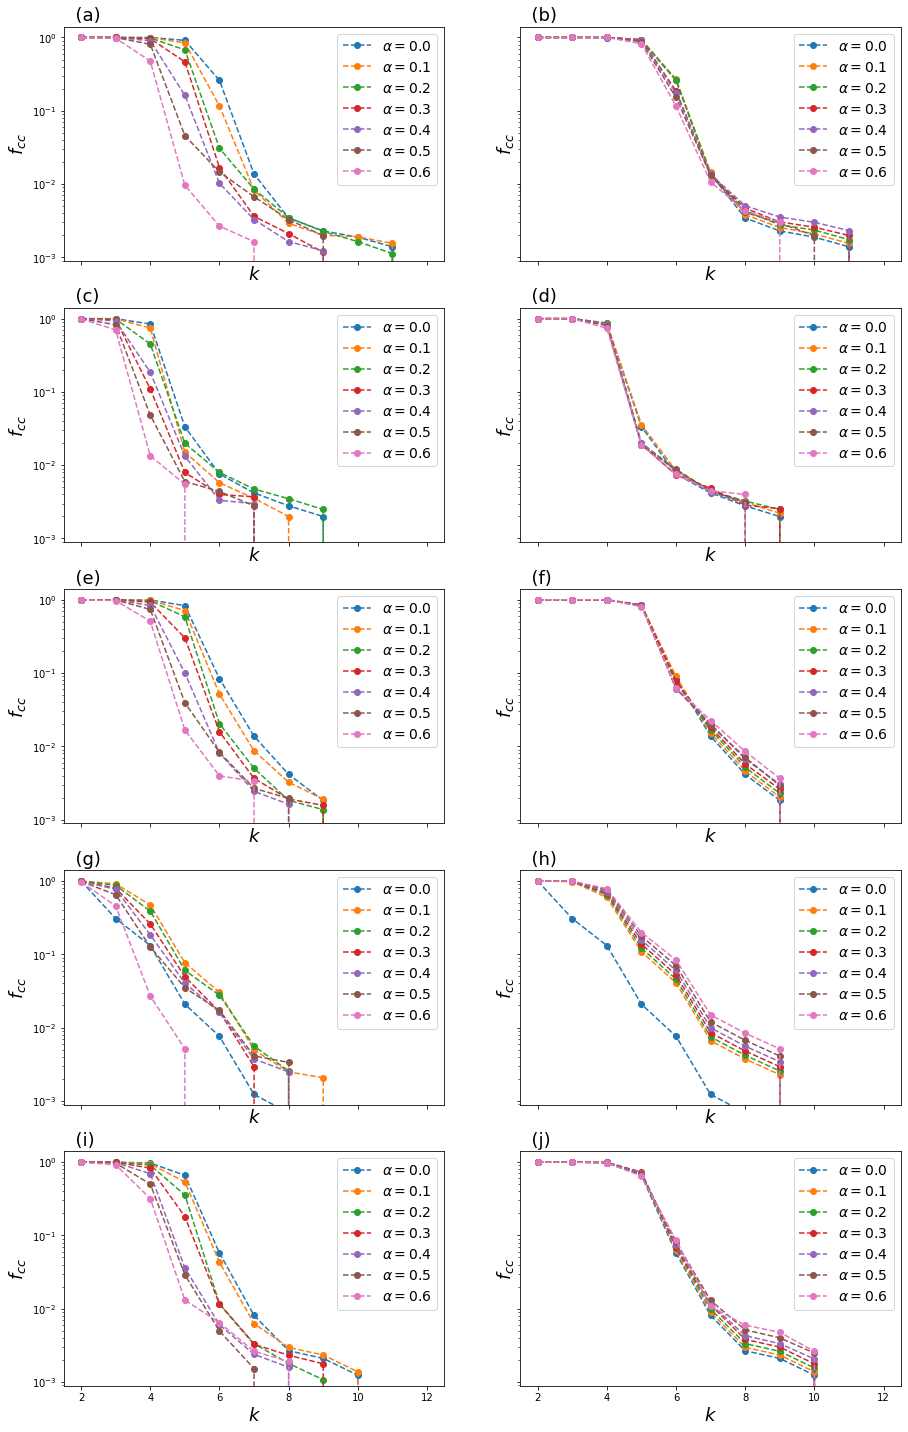

In [147]:
fig, ax = plt.subplots(nrows=5, sharex=True,sharey=True,ncols=2, figsize=(15, 25))

inds=[0,1,2,7,8]
data=[[r_cliqs1,r_cliqs2],[r_cliqs3,r_cliqs4],[r_cliqs5,r_cliqs6],[r_cliqs7,r_cliqs8],[r_cliqs9,r_cliqs10]]
sub=[['  (a)','  (b)'],['  (c)','  (d)'],['  (e)','  (f)'],['  (g)','  (h)'],['  (i)','  (j)']]

for i in range(5):
    for j in range(2):
        ax[i,j].plot(k_values,cliqs[inds[i]], 'o--', label=r'$\alpha=0.0$')
        for k in range(6):
            ax[i,j].plot(k_values,data[i][j][k], 'o--', label=r'$\alpha=$'+str(np.around(r_frac[k],1)))
        
        ax[i,j].legend(fontsize=14)
        ax[i,j].set_xlabel(r'$ k$', fontsize=18)
        ax[i,j].set_ylabel(r'$f_{cc}$', fontsize=18)
        ax[i,j].set_yscale('log')
        ax[i,j].set_title(sub[i][j],loc='left', fontsize=18)
        

#plt.savefig('figures\\fig-S01.pdf')